In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-stability-runge)

This function has infinitely many continuous derivatives on the entire real line and looks easy to approximate over $[-1,1]$.

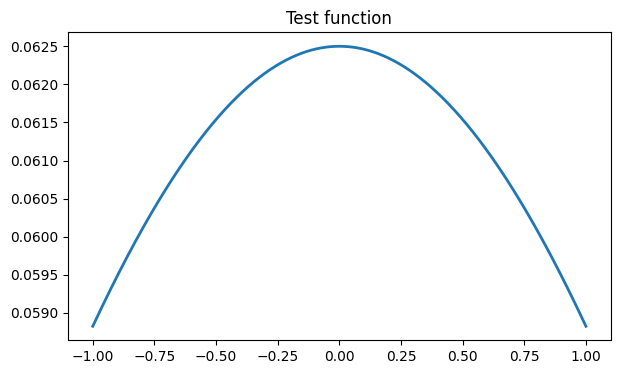

In [2]:
f = lambda x: 1 / (x**2 + 16)
x = linspace(-1, 1, 1601)
plot(x, f(x))
title("Test function");

We start by doing equispaced polynomial interpolation for some small values of $n$.

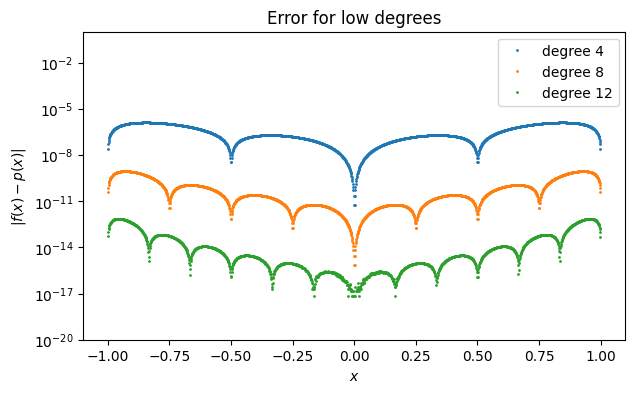

In [3]:
N = arange(4, 16, 4)
label = []
for k, n in enumerate(N):
    t = linspace(-1, 1, n + 1)  # equally spaced nodes
    y = f(t)  # interpolation data
    p = FNC.polyinterp(t, y)
    err = abs(f(x) - p(x))
    semilogy(x, err, ".", markersize=2)
    label.append(f"degree {n}")

xlabel("$x$"),  ylabel("$|f(x)-p(x)|$")
ylim([1e-20, 1])
legend(label),  title("Error for low degrees");

The convergence so far appears rather good, though not uniformly so. However, notice what happens as we continue to increase the degree.

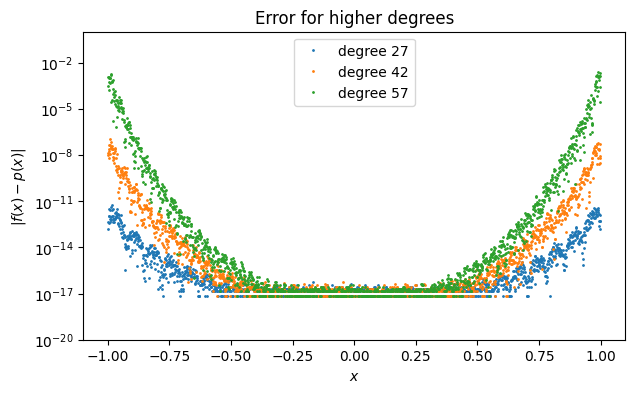

In [4]:
N = 12 + 15 * arange(1, 4)
labels = []
for k, n in enumerate(N):
    t = linspace(-1, 1, n + 1)  # equally spaced nodes
    y = f(t)  # interpolation data
    p = FNC.polyinterp(t, y)
    err = abs(f(x) - p(x))
    semilogy(x, err, ".", markersize=2)
    labels.append(f"degree {n}")
xlabel("$x$"),  ylabel("$|f(x)-p(x)|$"),  ylim([1e-20, 1])
legend(labels),  title("Error for higher degrees");

The convergence in the middle can't get any better than machine precision relative to the function values. So maintaining the growing gap between the center and the ends pushes the error curves upward exponentially fast at the ends, wrecking the convergence.